## Coursera Capstone project (Final)

In [3]:
#Importing all the required libraries.
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import requests

import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans


In [4]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium 



Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    altair-4.0.1               |             py_0         575 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following NEW packages will be 

In [43]:
# The code was removed by Watson Studio for sharing.

,Unnamed: 0,Borough,Neighborhoods,Latitude,Longitude,Population,City,AverageIncome
0,0,Central,Cantonment area,12.972442,77.580643,866377,Bangalore,18944.099792
1,1,Central,Domlur,12.960992,77.638726,743186,Bangalore,56837.022198
2,2,Central,Indiranagar,12.971891,77.641151,474289,Bangalore,41991.817435
3,3,Central,Jeevanbheemanagar,12.962900,77.659500,527874,Bangalore,6667.447632
4,4,Central,Malleswaram,13.003100,77.564300,893629,Bangalore,53270.063892
5,5,Central,Pete area,12.962700,77.575800,730999,Bangalore,50712.430215
6,6,Central,Rajajinagar,12.990100,77.552500,981362,Bangalore,60967.535874
7,7,Central,Sadashivanagar,13.006800,77.581300,662625,Bangalore,59943.541564
8,8,Central,Seshadripuram,12.993500,77.578700,396862,Bangalore,58407.090338
9,9,Central,Shivajinagar,12.985700,77.605700,77836,Bangalore,55850.962099


In [44]:
df.drop('Unnamed: 0',axis=1,inplace=True)

## Creating 'Population' and 'Income' dataframe from the main dataframe

In [45]:
bangalore_population = pd.DataFrame(df[['Borough','Neighborhoods','Population']])

In [46]:
bangalore_population.head()

,Borough,Neighborhoods,Population
0,Central,Cantonment area,866377
1,Central,Domlur,743186
2,Central,Indiranagar,474289
3,Central,Jeevanbheemanagar,527874
4,Central,Malleswaram,893629


In [47]:
bangalore_population.to_csv('population_dataset.csv')

In [48]:
bangalore_income = pd.DataFrame(df[['Borough','Neighborhoods','AverageIncome']])

In [49]:
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome
0,Central,Cantonment area,18944.099792
1,Central,Domlur,56837.022198
2,Central,Indiranagar,41991.817435
3,Central,Jeevanbheemanagar,6667.447632
4,Central,Malleswaram,53270.063892


In [50]:
bangalore_income.to_csv('income_dataset.csv')

In [51]:
bangalore_latitude = df['Latitude'].mean()
bangalore_longitude = df['Longitude'].mean()
print("Latitude and Longitude of Bangalore are : ",bangalore_latitude,bangalore_longitude)


Latitude and Longitude of Bangalore are :  12.962339620312497 77.60175294687502


## Using Foursquare Client Id and Secret ID

In [53]:
CLIENT_ID = '5KFA5P34JYPXWCSODGH4ZKJ2IXL5C3FB3DBDCYALGVTENAL5'
CLIENT_SECRET = 'OZKMMST2NU1UGRXDOURXGEA4ZOD4LYGC3P1GYRV34TTZATU0'
VERSION = '20180606'
LIMIT = 150


In [54]:
unique_boroughs_of_bangalore = df['Borough'].unique().tolist()

In [55]:
unique_boroughs_of_bangalore

['Central',
 'Eastern',
 'NorthEastern',
 'Northern',
 'SouthEastern',
 'Southern',
 'SouthernSuburbs',
 'Western']

In [56]:
borough_colors ={}
for i in unique_boroughs_of_bangalore:
    borough_colors[i] = '#%02X%02X%02X' % tuple(np.random.choice(range(256),size=3))


In [57]:
borough_colors

{'Central': '#C54732',
 'Eastern': '#7DA13D',
 'NorthEastern': '#72B3DD',
 'Northern': '#76C1B8',
 'SouthEastern': '#524F72',
 'Southern': '#26E19D',
 'SouthernSuburbs': '#892B53',
 'Western': '#38835F'}

In [58]:
bangalore_map = folium.Map(location=[bangalore_latitude,bangalore_longitude],zoom_start=12,control_scale=True)

In [59]:
for lat,lng,boro,nei in zip(df['Latitude'],
                           df['Longitude'],
                           df['Borough'],
                           df['Neighborhoods']):
    label_text = boro + ' - ' + nei
    label = folium.Popup(label_text,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    tooltip = label_text,
    radius = 4,
    popup = label,
    color=borough_colors[boro],
    fill=True,
    fill_color = borough_colors[boro],
    fill_opacity=0.7).add_to(bangalore_map)


In [61]:
bangalore_map

## Exploring bangalore Neighborhoods using FourSquare API

In [63]:
def getNearbyVenues(names, boro, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, boro, lat, lng in zip(names, boro, latitudes, longitudes):
        print("Fetching venues for : ",name)            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            boro,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Borough',
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)



In [64]:
bangalore_venues = getNearbyVenues(names=df['Neighborhoods'],latitudes=df['Latitude'],longitudes=df['Longitude'],boro=df['Borough'])

Fetching venues for :  Cantonment area
Fetching venues for :  Domlur
Fetching venues for :  Indiranagar
Fetching venues for :  Jeevanbheemanagar
Fetching venues for :  Malleswaram
Fetching venues for :  Pete area
Fetching venues for :  Rajajinagar
Fetching venues for :  Sadashivanagar
Fetching venues for :  Seshadripuram
Fetching venues for :  Shivajinagar
Fetching venues for :  Ulsoor
Fetching venues for :  Vasanth Nagar
Fetching venues for :  Bellandur
Fetching venues for :  CV Raman Nagar
Fetching venues for :  Hoodi
Fetching venues for :  Krishnarajapuram
Fetching venues for :  Mahadevapura
Fetching venues for :  Marathahalli
Fetching venues for :  Varthur
Fetching venues for :  Whitefield
Fetching venues for :  Banaswadi
Fetching venues for :  HBR Layout
Fetching venues for :  Horamavu
Fetching venues for :  Kammanahalli
Fetching venues for :  Lingarajapuram
Fetching venues for :  Ramamurthy Nagar
Fetching venues for :  Hebbal
Fetching venues for :  Jalahalli
Fetching venues for :

In [65]:
print("Total number of venues found in Bangalore are : ",bangalore_venues.shape[0])

Total number of venues found in Bangalore are :  604


In [66]:
bangalore_venues.head(5)

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cantonment area,Central,12.972442,77.580643,Hotel Fishland,12.975569,77.578592,Seafood Restaurant
1,Cantonment area,Central,12.972442,77.580643,Adigas Hotel,12.973554,77.579161,Restaurant
2,Cantonment area,Central,12.972442,77.580643,Vasudev Adigas,12.973707,77.579257,Indian Restaurant
3,Cantonment area,Central,12.972442,77.580643,Sapna Book House,12.976355,77.578461,Bookstore
4,Cantonment area,Central,12.972442,77.580643,Kamat Yatrinivas,12.975985,77.578125,Indian Restaurant


In [67]:
bangalore_venues.groupby('Venue Category').count()['Neighborhood'].sort_values(ascending=False).head(10)

Venue Category
Indian Restaurant       117
Café                     30
Fast Food Restaurant     30
Bakery                   26
Department Store         22
Ice Cream Shop           22
Pizza Place              19
Coffee Shop              15
Hotel                    13
Restaurant               12
Name: Neighborhood, dtype: int64

In [68]:
print("Total number of unique categories in bangalore are : ",len(bangalore_venues['Venue Category'].unique()))

Total number of unique categories in bangalore are :  127


## Getting number of venues per neighborhood

In [69]:
individual_bangalore_venue_count = bangalore_venues.groupby(['Borough','Neighborhood'])['Borough'].count().to_frame()

In [70]:
individual_bangalore_venue_count

Borough
Borough         Neighborhood                 
Central         Cantonment area             5
                Domlur                     12
                Indiranagar                64
                Jeevanbheemanagar           6
                Malleswaram                 7
                Pete area                   4
                Rajajinagar                10
                Sadashivanagar             22
                Seshadripuram               7
                Shivajinagar               10
                Ulsoor                      4
                Vasanth Nagar              24
Eastern         Bellandur                  27
                CV Raman Nagar              7
                Hoodi                       2
                Krishnarajapuram            3
                Mahadevapura                5
                Marathahalli                9
                Varthur                     1
                Whitefield                  9
NorthEastern    Banaswadi                   8
                HBR Layout                  4
                Horamavu                    1
                Kammanahalli               11
                Lingarajapuram              2
                Ramamurthy Nagar            4
Northern        Hebbal                      7
                Jalahalli                   3
                Mathikere                  18
                R. T. Nagar                 7
...                                       ...
SouthEastern    BTM Layout                 35
                Bommanahalli                5
                Bommasandra                 1
                Electronic City             5
                HSR Layout                  9
                Koramangala                 7
                Madiwala                   23
Southern        Banashankari               11
                Basavanagudi               11
                Girinagar                   4
                J. P. Nagar                28
                Jayanagar                  15
                Kumaraswamy Layout          7
                Padmanabhanagar             3
                Uttarahalli                12
SouthernSuburbs Anjanapura                  1
                Arekere                    28
                Begur                       3
                Gottigere                   8
                Hulimavu                    5
                Kothnur                     4
Western         Basaveshwaranagar          19
                Kamakshipalya               1
                Kengeri                     5
                Mahalakshmi Layout         11
                Nagarbhavi                  8
                Nandini Layout              2
                Nayandahalli                5
                Rajarajeshwari Nagar        6
                Vijayanagar                 4

[62 rows x 1 columns]

In [71]:
individual_bangalore_venue_count.rename(columns={'Borough':'NumberOfVenues'},inplace=True)

In [72]:
individual_bangalore_venue_count.reset_index(inplace=True)

In [73]:
individual_bangalore_venue_count

,Borough,Neighborhood,NumberOfVenues
0,Central,Cantonment area,5
1,Central,Domlur,12
2,Central,Indiranagar,64
3,Central,Jeevanbheemanagar,6
4,Central,Malleswaram,7
5,Central,Pete area,4
6,Central,Rajajinagar,10
7,Central,Sadashivanagar,22
8,Central,Seshadripuram,7
9,Central,Shivajinagar,10


[Text(0, 0, 'Cantonment area'),
 Text(0, 0, 'Domlur'),
 Text(0, 0, 'Indiranagar'),
 Text(0, 0, 'Jeevanbheemanagar'),
 Text(0, 0, 'Malleswaram'),
 Text(0, 0, 'Pete area'),
 Text(0, 0, 'Rajajinagar'),
 Text(0, 0, 'Sadashivanagar'),
 Text(0, 0, 'Seshadripuram'),
 Text(0, 0, 'Shivajinagar'),
 Text(0, 0, 'Ulsoor'),
 Text(0, 0, 'Vasanth Nagar'),
 Text(0, 0, 'Bellandur'),
 Text(0, 0, 'CV Raman Nagar'),
 Text(0, 0, 'Hoodi'),
 Text(0, 0, 'Krishnarajapuram'),
 Text(0, 0, 'Mahadevapura'),
 Text(0, 0, 'Marathahalli'),
 Text(0, 0, 'Varthur'),
 Text(0, 0, 'Whitefield'),
 Text(0, 0, 'Banaswadi'),
 Text(0, 0, 'HBR Layout'),
 Text(0, 0, 'Horamavu'),
 Text(0, 0, 'Kammanahalli'),
 Text(0, 0, 'Lingarajapuram'),
 Text(0, 0, 'Ramamurthy Nagar'),
 Text(0, 0, 'Hebbal'),
 Text(0, 0, 'Jalahalli'),
 Text(0, 0, 'Mathikere'),
 Text(0, 0, 'R. T. Nagar'),
 Text(0, 0, 'Yelahanka'),
 Text(0, 0, 'Yeshwanthpur'),
 Text(0, 0, 'BTM Layout'),
 Text(0, 0, 'Bommanahalli'),
 Text(0, 0, 'Bommasandra'),
 Text(0, 0, 'Electronic 

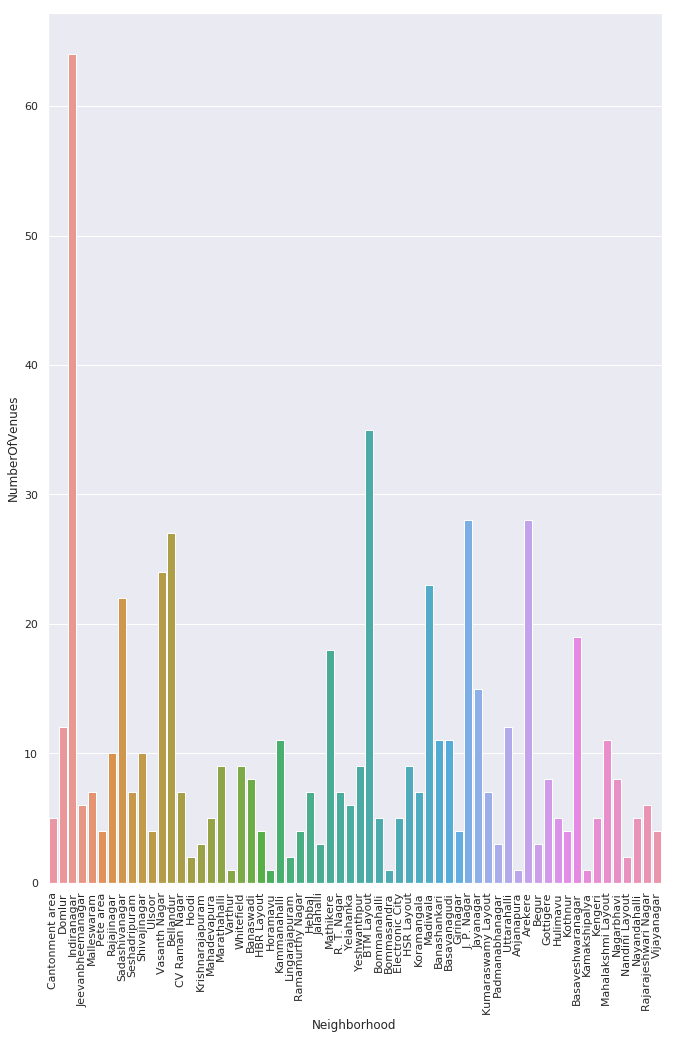

In [75]:
sns.set(rc={'figure.figsize':(11,16)})
plot = sns.barplot(x='Neighborhood',y='NumberOfVenues',data=individual_bangalore_venue_count)
plot.set_xticklabels(individual_bangalore_venue_count['Neighborhood'],rotation=90)



### From the above graph we can see that inderanagar has most number of venues and soo on...

## Exploring Mathikere venues

In [78]:
bangalore_venues[bangalore_venues['Neighborhood']=='Mathikere']

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
278,Mathikere,Northern,13.0334,77.564,Biriyani Paradise,13.030652,77.562216,Indian Restaurant
279,Mathikere,Northern,13.0334,77.564,Domino's Pizza,13.037154,77.565749,Pizza Place
280,Mathikere,Northern,13.0334,77.564,Shanthi Sagar,13.036968,77.565985,Indian Restaurant
281,Mathikere,Northern,13.0334,77.564,Maha Bazaar,13.037194,77.565820,Department Store
282,Mathikere,Northern,13.0334,77.564,Shahi Darbar,13.032551,77.565631,Indian Restaurant
283,Mathikere,Northern,13.0334,77.564,Little Bites,13.032571,77.566126,Sandwich Place
284,Mathikere,Northern,13.0334,77.564,Kaya Skin Clinic,13.033602,77.560797,Cosmetics Shop
285,Mathikere,Northern,13.0334,77.564,Polar Bear,13.034556,77.560999,Ice Cream Shop
286,Mathikere,Northern,13.0334,77.564,Ammi's Biryani,13.034208,77.560674,Indian Restaurant
287,Mathikere,Northern,13.0334,77.564,Basketball Court M S Ramaiah College,13.031035,77.566607,Basketball Court


### One hot encoding for letting us to compare different venues based on some common scale

In [79]:
bangalore_venues_onehot = pd.get_dummies(bangalore_venues[['Venue Category']])

In [80]:
bangalore_venues_onehot

,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bakery,...,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
bangalore_venues_onehot['Neighborhood'] = bangalore_venues['Neighborhood']
bangalore_venues_grouped = bangalore_venues_onehot.groupby('Neighborhood').mean().reset_index()
bangalore_venues_grouped


,Neighborhood,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,...,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio
0,Anjanapura,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Arekere,0.0,0.000000,0.000000,0.000000,0.000000,0.035714,0.0,0.000000,0.035714,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,BTM Layout,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.057143,0.000000,0.000000,0.000000
3,Banashankari,0.0,0.090909,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Banaswadi,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000
5,Basavanagudi,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Basaveshwaranagar,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Begur,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Bellandur,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.037037,0.000000,0.000000,0.000000,0.000000,0.000000
9,Bommanahalli,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [82]:
number_of_top_venues = 5

In [83]:
for hood in bangalore_venues_grouped['Neighborhood']:
    print('---------',hood,'---------')
    temp = bangalore_venues_grouped[bangalore_venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['Venue','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(number_of_top_venues))
    print('\n')


--------- Anjanapura ---------
                                  Venue  Frequency
0                    Venue Category_ATM        1.0
1        Venue Category_Motorcycle Shop        0.0
2            Venue Category_Pizza Place        0.0
3               Venue Category_Pharmacy        0.0
4  Venue Category_Performing Arts Venue        0.0


--------- Arekere ---------
                                 Venue  Frequency
0     Venue Category_Indian Restaurant       0.14
1   Venue Category_Sporting Goods Shop       0.14
2      Venue Category_Department Store       0.11
3           Venue Category_Pizza Place       0.07
4  Venue Category_Fast Food Restaurant       0.04


--------- BTM Layout ---------
                                          Venue  Frequency
0              Venue Category_Indian Restaurant       0.20
1                    Venue Category_Snack Place       0.09
2                 Venue Category_Ice Cream Shop       0.09
3           Venue Category_Fast Food Restaurant       0.09
4  Ve

### Frequency of each neighborhood and its top 5 venues can be known. This is very important is we can analyze top neighborhoods with most busy restaurants

In [84]:
def return_most_common_venues(row, number_of_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:number_of_top_venues]


In [86]:
number_of_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']


In [88]:
for ind in np.arange(number_of_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bangalore_venues_grouped['Neighborhood']

for ind in np.arange(bangalore_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bangalore_venues_grouped.iloc[ind, :], number_of_top_venues)

neighborhoods_venues_sorted.head()


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Anjanapura,Venue Category_ATM,Venue Category_Food & Drink Shop,Venue Category_Deli / Bodega,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store
1,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Bus Line,Venue Category_Gym / Fitness Center,Venue Category_Neighborhood,Venue Category_Mughlai Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Chinese Restaurant
2,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Fast Food Restaurant,Venue Category_Snack Place,Venue Category_Bakery,Venue Category_Gym,Venue Category_Chinese Restaurant,Venue Category_Sandwich Place,Venue Category_Pizza Place,Venue Category_Vegetarian / Vegan Restaurant
3,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Shoe Store,Venue Category_Sporting Goods Shop,Venue Category_Fast Food Restaurant,Venue Category_North Indian Restaurant,Venue Category_Pizza Place,Venue Category_Accessories Store,Venue Category_Dessert Shop
4,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Juice Bar,Venue Category_Grocery Store,Venue Category_Bakery,Venue Category_Eastern European Restaurant,Venue Category_Fish & Chips Shop,Venue Category_Fast Food Restaurant,Venue Category_Falafel Restaurant,Venue Category_Electronics Store


In [89]:
neighborhoods_venues_sorted.shape

(62, 11)

### Next challenge is to find the optimal k value for clustering and we do it using the elbow method


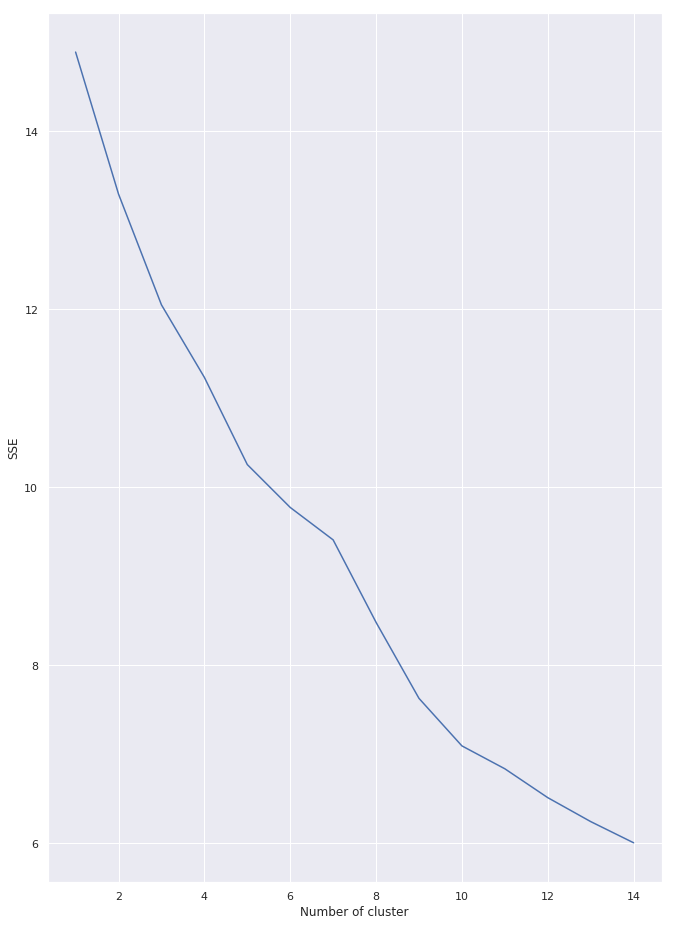

In [90]:
sse = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(bangalore_venues_grouped.drop('Neighborhood',axis=1))
    bangalore_venues_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()


### From the above graph, we can see the optimal value for cluster is 5

In [91]:
kmeans = KMeans(n_clusters=5,random_state=0)

In [92]:
kmeans.fit(bangalore_venues_grouped.drop('Neighborhood',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [93]:
bangalore_venues_grouped['Cluster'] = kmeans.labels_

In [94]:
bangalore_venues_grouped.groupby('Cluster')['Neighborhood'].count()

Cluster
0    19
1    14
2    19
3     4
4     6
Name: Neighborhood, dtype: int64

In [95]:
bangalore_venues_grouped.columns

Index(['Neighborhood', 'Venue Category_ATM',
       'Venue Category_Accessories Store', 'Venue Category_Andhra Restaurant',
       'Venue Category_Art Museum', 'Venue Category_Asian Restaurant',
       'Venue Category_Athletics & Sports', 'Venue Category_Auto Garage',
       'Venue Category_BBQ Joint', 'Venue Category_Badminton Court',
       ...
       'Venue Category_Tex-Mex Restaurant', 'Venue Category_Toll Plaza',
       'Venue Category_Train Station', 'Venue Category_Travel & Transport',
       'Venue Category_Udupi Restaurant',
       'Venue Category_Vegetarian / Vegan Restaurant',
       'Venue Category_Vietnamese Restaurant', 'Venue Category_Women's Store',
       'Venue Category_Yoga Studio', 'Cluster'],
      dtype='object', length=129)

In [96]:
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(bangalore_venues_grouped,on='Neighborhood')

In [97]:
neighborhoods_venues_sorted.head(4)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster
0,Anjanapura,Venue Category_ATM,Venue Category_Food & Drink Shop,Venue Category_Deli / Bodega,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Eastern European Restaurant,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,4
1,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Bus Line,Venue Category_Gym / Fitness Center,Venue Category_Neighborhood,Venue Category_Mughlai Restaurant,Venue Category_Fast Food Restaurant,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,2
2,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Fast Food Restaurant,Venue Category_Snack Place,Venue Category_Bakery,Venue Category_Gym,Venue Category_Chinese Restaurant,Venue Category_Sandwich Place,Venue Category_Pizza Place,...,0.0,0.0,0.0,0.0,0.0,0.057143,0.0,0.0,0.0,2
3,Banashankari,Venue Category_Clothing Store,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Shoe Store,Venue Category_Sporting Goods Shop,Venue Category_Fast Food Restaurant,Venue Category_North Indian Restaurant,Venue Category_Pizza Place,Venue Category_Accessories Store,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1


In [98]:
neighborhoods_venues_sorted.columns
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(bangalore_venues,on='Neighborhood')


In [99]:
# create map
map_clusters = folium.Map(location=[bangalore_latitude, bangalore_longitude], zoom_start=11)


In [100]:
# set color scheme for the clusters
x = np.arange(6)
ys = [i + x + (i*x)**2 for i in range(6)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_venues_sorted['Neighborhood Latitude'], neighborhoods_venues_sorted['Neighborhood Longitude'], neighborhoods_venues_sorted['Neighborhood'], neighborhoods_venues_sorted['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)


In [101]:
map_clusters

## Finding similar locations based on user input (recommending location)

### We need to analyze factors such as population and Income to recommend.

In [102]:
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome
0,Central,Cantonment area,18944.099792
1,Central,Domlur,56837.022198
2,Central,Indiranagar,41991.817435
3,Central,Jeevanbheemanagar,6667.447632
4,Central,Malleswaram,53270.063892


In [103]:
bangalore_population.head()

,Borough,Neighborhoods,Population
0,Central,Cantonment area,866377
1,Central,Domlur,743186
2,Central,Indiranagar,474289
3,Central,Jeevanbheemanagar,527874
4,Central,Malleswaram,893629


In [104]:
bangalore_population['Normalized_population'] = bangalore_population['Population']/bangalore_population['Population'].max(axis=0)
bangalore_population.head()


,Borough,Neighborhoods,Population,Normalized_population
0,Central,Cantonment area,866377,0.880810
1,Central,Domlur,743186,0.755567
2,Central,Indiranagar,474289,0.482190
3,Central,Jeevanbheemanagar,527874,0.536668
4,Central,Malleswaram,893629,0.908516


In [105]:
bangalore_income['Normalized_income'] = bangalore_income['AverageIncome']/bangalore_income['AverageIncome'].max(axis=0)
bangalore_income.head()


,Borough,Neighborhoods,AverageIncome,Normalized_income
0,Central,Cantonment area,18944.099792,0.293051
1,Central,Domlur,56837.022198,0.879225
2,Central,Indiranagar,41991.817435,0.649581
3,Central,Jeevanbheemanagar,6667.447632,0.103140
4,Central,Malleswaram,53270.063892,0.824047


In [106]:
bangalore_venues_grouped.head(1)

,Neighborhood,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,...,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster
0,Anjanapura,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [107]:
bangalore_veg = bangalore_venues_onehot.groupby(['Neighborhood']).sum().reset_index()
bangalore_veg.head()


,Neighborhood,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,...,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio
0,Anjanapura,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Arekere,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,BTM Layout,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
3,Banashankari,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Banaswadi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [108]:
bangalore_veg['Venue Category_Vegetarian / Vegan Restaurant']

0     0
1     0
2     2
3     0
4     1
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    3
25    0
26    0
27    0
28    0
29    0
     ..
32    1
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    1
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    1
58    0
59    0
60    0
61    0
Name: Venue Category_Vegetarian / Vegan Restaurant, Length: 62, dtype: uint8

In [109]:
bangalore_veg = bangalore_veg[['Neighborhood','Venue Category_Vegetarian / Vegan Restaurant']]

In [110]:
bangalore_veg.rename(columns={'Venue Category_Vegetarian / Vegan Restaurant':'NumberOfVegRestaurants'},inplace=True)

In [111]:
bangalore_veg.head()

,Neighborhood,NumberOfVegRestaurants
0,Anjanapura,0
1,Arekere,0
2,BTM Layout,2
3,Banashankari,0
4,Banaswadi,1


In [112]:
bangalore_veg['NumberOfNonVeganrestaurants'] = 1-(bangalore_veg['NumberOfVegRestaurants']/bangalore_veg['NumberOfVegRestaurants'].max(axis=0))

In [113]:
bangalore_veg.head(10)

,Neighborhood,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Anjanapura,0,1.000000
1,Arekere,0,1.000000
2,BTM Layout,2,0.333333
3,Banashankari,0,1.000000
4,Banaswadi,1,0.666667
5,Basavanagudi,0,1.000000
6,Basaveshwaranagar,0,1.000000
7,Begur,0,1.000000
8,Bellandur,0,1.000000
9,Bommanahalli,0,1.000000


In [114]:
bangalore_veg.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

### Building a target neighborhood by providing a sample restaurant : say ' Mathikere '

In [115]:
target_cluster_dataframe = neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Neighborhood']=='Mathikere']

In [116]:
target_cluster_dataframe.reset_index()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,429,Mathikere,Venue Category_Indian Restaurant,Venue Category_Cosmetics Shop,Venue Category_Basketball Court,Venue Category_Kerala Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Department Store,Venue Category_Sandwich Place,Venue Category_Bus Station,...,0.0,0.0,0,Northern,13.0334,77.564,Biriyani Paradise,13.030652,77.562216,Indian Restaurant
1,430,Mathikere,Venue Category_Indian Restaurant,Venue Category_Cosmetics Shop,Venue Category_Basketball Court,Venue Category_Kerala Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Department Store,Venue Category_Sandwich Place,Venue Category_Bus Station,...,0.0,0.0,0,Northern,13.0334,77.564,Domino's Pizza,13.037154,77.565749,Pizza Place
2,431,Mathikere,Venue Category_Indian Restaurant,Venue Category_Cosmetics Shop,Venue Category_Basketball Court,Venue Category_Kerala Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Department Store,Venue Category_Sandwich Place,Venue Category_Bus Station,...,0.0,0.0,0,Northern,13.0334,77.564,Shanthi Sagar,13.036968,77.565985,Indian Restaurant
3,432,Mathikere,Venue Category_Indian Restaurant,Venue Category_Cosmetics Shop,Venue Category_Basketball Court,Venue Category_Kerala Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Department Store,Venue Category_Sandwich Place,Venue Category_Bus Station,...,0.0,0.0,0,Northern,13.0334,77.564,Maha Bazaar,13.037194,77.565820,Department Store
4,433,Mathikere,Venue Category_Indian Restaurant,Venue Category_Cosmetics Shop,Venue Category_Basketball Court,Venue Category_Kerala Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Department Store,Venue Category_Sandwich Place,Venue Category_Bus Station,...,0.0,0.0,0,Northern,13.0334,77.564,Shahi Darbar,13.032551,77.565631,Indian Restaurant
5,434,Mathikere,Venue Category_Indian Restaurant,Venue Category_Cosmetics Shop,Venue Category_Basketball Court,Venue Category_Kerala Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Department Store,Venue Category_Sandwich Place,Venue Category_Bus Station,...,0.0,0.0,0,Northern,13.0334,77.564,Little Bites,13.032571,77.566126,Sandwich Place
6,435,Mathikere,Venue Category_Indian Restaurant,Venue Category_Cosmetics Shop,Venue Category_Basketball Court,Venue Category_Kerala Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Department Store,Venue Category_Sandwich Place,Venue Category_Bus Station,...,0.0,0.0,0,Northern,13.0334,77.564,Kaya Skin Clinic,13.033602,77.560797,Cosmetics Shop
7,436,Mathikere,Venue Category_Indian Restaurant,Venue Category_Cosmetics Shop,Venue Category_Basketball Court,Venue Category_Kerala Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Department Store,Venue Category_Sandwich Place,Venue Category_Bus Station,...,0.0,0.0,0,Northern,13.0334,77.564,Polar Bear,13.034556,77.560999,Ice Cream Shop
8,437,Mathikere,Venue Category_Indian Restaurant,Venue Category_Cosmetics Shop,Venue Category_Basketball Court,Venue Category_Kerala Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Department Store,Venue Category_Sandwich Place,Venue Category_Bus Station,...,0.0,0.0,0,Northern,13.0334,77.564,Ammi's Biryani,13.034208,77.560674,Indian Restaurant
9,438,Mathikere,Venue Category_Indian Restaurant,Venue Category_Cosmetics Shop,Venue Category_Basketball Court,Venue Category_Kerala Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Department Store,Venue Category_Sandwich Place,Venue Category_Bus Station,...,0.0,0.0,0,Northern,13.0334,77.564,Basketball Court M S Ramaiah College,13.031035,77.566607,Basketball Court


In [117]:
target_cluster = target_cluster_dataframe.iloc[0].at['Cluster']

In [118]:
target_cluster

0

In [119]:
print("The target cluster is : ",target_cluster)

The target cluster is :  0


In [120]:
possible_neighborhoods = neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster']==target_cluster]
possible_neighborhoods.head()


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
75,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Juice Bar,Venue Category_Grocery Store,Venue Category_Bakery,Venue Category_Eastern European Restaurant,Venue Category_Fish & Chips Shop,Venue Category_Fast Food Restaurant,Venue Category_Falafel Restaurant,...,0.0,0.0,0,NorthEastern,13.012,77.6471,Tamarind,13.012676,77.647711,Indian Restaurant
76,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Juice Bar,Venue Category_Grocery Store,Venue Category_Bakery,Venue Category_Eastern European Restaurant,Venue Category_Fish & Chips Shop,Venue Category_Fast Food Restaurant,Venue Category_Falafel Restaurant,...,0.0,0.0,0,NorthEastern,13.012,77.6471,Amma Pasteries,13.009575,77.643255,Bakery
77,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Juice Bar,Venue Category_Grocery Store,Venue Category_Bakery,Venue Category_Eastern European Restaurant,Venue Category_Fish & Chips Shop,Venue Category_Fast Food Restaurant,Venue Category_Falafel Restaurant,...,0.0,0.0,0,NorthEastern,13.012,77.6471,Saffron,13.012763,77.647837,Vegetarian / Vegan Restaurant
78,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Juice Bar,Venue Category_Grocery Store,Venue Category_Bakery,Venue Category_Eastern European Restaurant,Venue Category_Fish & Chips Shop,Venue Category_Fast Food Restaurant,Venue Category_Falafel Restaurant,...,0.0,0.0,0,NorthEastern,13.012,77.6471,Sreeraj Lassi Bar,13.012435,77.647729,Juice Bar
79,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Juice Bar,Venue Category_Grocery Store,Venue Category_Bakery,Venue Category_Eastern European Restaurant,Venue Category_Fish & Chips Shop,Venue Category_Fast Food Restaurant,Venue Category_Falafel Restaurant,...,0.0,0.0,0,NorthEastern,13.012,77.6471,Taste of Bengal,13.014701,77.646993,Indian Restaurant


In [122]:
print("There are {} neighborhoods which has similar characteristics to Mathikere.".format(possible_neighborhoods.shape[0]))

There are 167 neighborhoods which has similar characteristics to Mathikere.


In [125]:
possible_neighborhoods.reset_index().head()

,index,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,75,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Juice Bar,Venue Category_Grocery Store,Venue Category_Bakery,Venue Category_Eastern European Restaurant,Venue Category_Fish & Chips Shop,Venue Category_Fast Food Restaurant,...,0.0,0.0,0,NorthEastern,13.012,77.6471,Tamarind,13.012676,77.647711,Indian Restaurant
1,76,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Juice Bar,Venue Category_Grocery Store,Venue Category_Bakery,Venue Category_Eastern European Restaurant,Venue Category_Fish & Chips Shop,Venue Category_Fast Food Restaurant,...,0.0,0.0,0,NorthEastern,13.012,77.6471,Amma Pasteries,13.009575,77.643255,Bakery
2,77,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Juice Bar,Venue Category_Grocery Store,Venue Category_Bakery,Venue Category_Eastern European Restaurant,Venue Category_Fish & Chips Shop,Venue Category_Fast Food Restaurant,...,0.0,0.0,0,NorthEastern,13.012,77.6471,Saffron,13.012763,77.647837,Vegetarian / Vegan Restaurant
3,78,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Juice Bar,Venue Category_Grocery Store,Venue Category_Bakery,Venue Category_Eastern European Restaurant,Venue Category_Fish & Chips Shop,Venue Category_Fast Food Restaurant,...,0.0,0.0,0,NorthEastern,13.012,77.6471,Sreeraj Lassi Bar,13.012435,77.647729,Juice Bar
4,79,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Juice Bar,Venue Category_Grocery Store,Venue Category_Bakery,Venue Category_Eastern European Restaurant,Venue Category_Fish & Chips Shop,Venue Category_Fast Food Restaurant,...,0.0,0.0,0,NorthEastern,13.012,77.6471,Taste of Bengal,13.014701,77.646993,Indian Restaurant


In [124]:
# Renaming a column
possible_neighborhoods.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


## Now we need to create ranking by combining population and income factors as well?

In [126]:
possible_neighborhoods = possible_neighborhoods.merge(bangalore_population[['Neighborhoods','Population','Normalized_population']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(bangalore_income[['Neighborhoods','AverageIncome','Normalized_income']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(bangalore_veg[['Neighborhoods','NumberOfVegRestaurants','NumberOfNonVeganrestaurants']],on='Neighborhoods')


In [127]:
possible_neighborhoods.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,AverageIncome,Normalized_income,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Juice Bar,Venue Category_Grocery Store,Venue Category_Bakery,Venue Category_Eastern European Restaurant,Venue Category_Fish & Chips Shop,Venue Category_Fast Food Restaurant,Venue Category_Falafel Restaurant,...,Tamarind,13.012676,77.647711,Indian Restaurant,632031,0.64256,53349.701184,0.825279,1,0.666667
1,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Juice Bar,Venue Category_Grocery Store,Venue Category_Bakery,Venue Category_Eastern European Restaurant,Venue Category_Fish & Chips Shop,Venue Category_Fast Food Restaurant,Venue Category_Falafel Restaurant,...,Amma Pasteries,13.009575,77.643255,Bakery,632031,0.64256,53349.701184,0.825279,1,0.666667
2,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Juice Bar,Venue Category_Grocery Store,Venue Category_Bakery,Venue Category_Eastern European Restaurant,Venue Category_Fish & Chips Shop,Venue Category_Fast Food Restaurant,Venue Category_Falafel Restaurant,...,Saffron,13.012763,77.647837,Vegetarian / Vegan Restaurant,632031,0.64256,53349.701184,0.825279,1,0.666667
3,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Juice Bar,Venue Category_Grocery Store,Venue Category_Bakery,Venue Category_Eastern European Restaurant,Venue Category_Fish & Chips Shop,Venue Category_Fast Food Restaurant,Venue Category_Falafel Restaurant,...,Sreeraj Lassi Bar,13.012435,77.647729,Juice Bar,632031,0.64256,53349.701184,0.825279,1,0.666667
4,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Juice Bar,Venue Category_Grocery Store,Venue Category_Bakery,Venue Category_Eastern European Restaurant,Venue Category_Fish & Chips Shop,Venue Category_Fast Food Restaurant,Venue Category_Falafel Restaurant,...,Taste of Bengal,13.014701,77.646993,Indian Restaurant,632031,0.64256,53349.701184,0.825279,1,0.666667


In [128]:
possible_neighborhoods['Ranking'] = possible_neighborhoods['Normalized_population'] * 0.5 + possible_neighborhoods['Normalized_income'] * 0.35 + possible_neighborhoods['NumberOfNonVeganrestaurants'] * 0.1
recommended_neighborhoods = possible_neighborhoods.sort_values(by='Ranking',ascending=False)
recommended_neighborhoods.reset_index(inplace=True, drop=True)


In [129]:
recommended_neighborhoods.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,AverageIncome,Normalized_income,NumberOfVegRestaurants,NumberOfNonVeganrestaurants,Ranking
0,Rajajinagar,Venue Category_Indian Restaurant,Venue Category_Bakery,Venue Category_Snack Place,Venue Category_Park,Venue Category_Café,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,Venue Category_Diner,...,12.987669,77.549978,Bakery,981362,0.99771,60967.535874,0.943121,0,1.0,0.928947
1,Rajajinagar,Venue Category_Indian Restaurant,Venue Category_Bakery,Venue Category_Snack Place,Venue Category_Park,Venue Category_Café,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,Venue Category_Diner,...,12.990884,77.556162,Snack Place,981362,0.99771,60967.535874,0.943121,0,1.0,0.928947
2,Rajajinagar,Venue Category_Indian Restaurant,Venue Category_Bakery,Venue Category_Snack Place,Venue Category_Park,Venue Category_Café,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,Venue Category_Diner,...,12.991578,77.554561,Bakery,981362,0.99771,60967.535874,0.943121,0,1.0,0.928947
3,Rajajinagar,Venue Category_Indian Restaurant,Venue Category_Bakery,Venue Category_Snack Place,Venue Category_Park,Venue Category_Café,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,Venue Category_Diner,...,12.987441,77.549826,Bakery,981362,0.99771,60967.535874,0.943121,0,1.0,0.928947
4,Rajajinagar,Venue Category_Indian Restaurant,Venue Category_Bakery,Venue Category_Snack Place,Venue Category_Park,Venue Category_Café,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,Venue Category_Diner,...,12.989189,77.550302,Indian Restaurant,981362,0.99771,60967.535874,0.943121,0,1.0,0.928947


In [130]:
top3 = recommended_neighborhoods.groupby(['Neighborhoods','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue'])['Ranking'].unique()

In [131]:
top3_df = pd.DataFrame(top3).reset_index()

In [132]:
top3_df.head(3)

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Ranking
0,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Juice Bar,[0.6767941404253282]
1,Basavanagudi,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Road,[0.6589806874118266]
2,Cantonment area,Venue Category_Indian Restaurant,Venue Category_Bookstore,Venue Category_Restaurant,[0.6429726634818888]


#### Here, according the data, we see that 'Banaswadi,Basavanagudi and Cantonment area' are top 3 neighborhoods to find similar food to Mathikere restaurant's veg food ! 
#### Here our model will recommend these neighborneeds and top 3 common venues to visit.


## Thanks for Reviewing 